In [1]:
import pip
from warnings import filterwarnings
filterwarnings("ignore")
def import_or_install(package:str):
    try:
        __import__(package)
        return 'Found'
    except ImportError:
        pip.main(['install', package]) 
        return 'Installed'
    
packages = ['pandas', 'tqdm', 'numpy','psutil', 'statsmodels']
[import_or_install(i) for i in packages]

#filter harmless warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
#configure dataframe display options
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',None)
pd.set_option('mode.chained_assignment', None)

/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
import pip
from warnings import filterwarnings
filterwarnings("ignore")
def import_or_install(package:str):
    try:
        __import__(package)
        return 'Found'
    except ImportError:
        pip.main(['install', package]) 
        return 'Installed'
    
packages = ['pandas', 'tqdm', 'numpy','psutil', 'statsmodels']
[import_or_install(i) for i in packages]

#filter harmless warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
#configure dataframe display options
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',None)
pd.set_option('mode.chained_assignment', None)

from watermark import watermark
print(watermark())
print(watermark(iversions=True, globals_=globals()))

Last updated: 2024-03-27T21:16:54.791169-07:00

Python implementation: CPython
Python version       : 3.10.13
IPython version      : 8.15.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

pip   : 23.2.1
pandas: 2.0.3



In [3]:
import pandas as pd
from prophet import Prophet

# Load the CSV file into a DataFrame
all_data = pd.read_csv('stock_data.csv')

# Display the DataFrame to verify it has been imported correctly
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-04-01,21.670000,21.700001,21.320000,21.430000,15.651334,33718100.0,INTC
1,<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-02,21.520000,21.580000,21.320000,21.459999,15.673239,28166700.0,INTC
3,2013-04-03,21.450001,21.500000,21.010000,21.049999,15.373801,36620800.0,INTC
4,2013-04-04,21.049999,21.190001,20.959999,21.139999,15.439535,28702500.0,INTC
...,...,...,...,...,...,...,...,...
17573,>>>>>>> 82994829e4ba429f4bb14cac178a16e21176a632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17574,2023-03-23,144.276672,147.630005,143.133331,145.676666,142.548950,4039800.0,SOXX
17575,2023-03-24,144.496674,144.889999,141.699997,143.149994,140.076523,3120600.0,SOXX
17576,2023-03-27,143.666672,144.106674,140.973328,141.470001,138.432602,1806300.0,SOXX


In [4]:
import yfinance as yf

# Ticker symbol for AMD
soxx_symbol = 'SOXX'

# Fetch SOXX ETF data for the past 11 years
soxx_data = yf.download(soxx_symbol, period='11y')

soxx_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,227.369995,229.279999,224.759995,225.179993,225.179993,4059800
2024-03-22,224.160004,227.100006,223.449997,225.449997,225.449997,2658100
2024-03-25,222.250000,226.610001,221.710007,224.570007,224.570007,2283500
2024-03-26,226.190002,226.880005,222.830002,222.880005,222.880005,4414200
2024-03-27,225.389999,225.759995,221.399994,225.679993,225.679993,4161300


[*********************100%%**********************]  1 of 1 completed


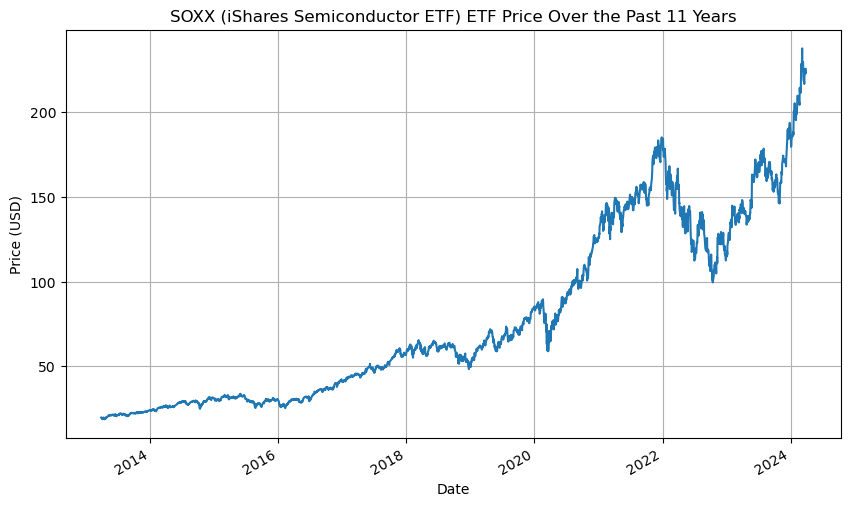

In [5]:
import matplotlib.pyplot as plt

# Ticker symbol for SOXX ETF
soxx_symbol = 'SOXX'

# Fetch SOXX ETF data for the past 11 years
amd_data = yf.download(soxx_symbol, period='11y')

# Plot the 'Close' price
plt.figure(figsize=(10, 6))
soxx_data['Close'].plot()
plt.title('SOXX (iShares Semiconductor ETF) ETF Price Over the Past 11 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [6]:
# Filter the data for SOXX
soxx_data = all_data[all_data['Ticker'] == 'SOXX']

# Prophet expects the 'Date' and 'Close' columns
soxx_data = soxx_data[['Date', 'Close']]
soxx_data.columns = ['ds', 'y']  # Renaming columns for Prophet

# Create a Prophet model for SOXX
model_soxx = Prophet()

# Fit the model
model_soxx.fit(soxx_data)

# Make a future dataframe for one year past the last available date
future_soxx = model_soxx.make_future_dataframe(periods=365)

# Forecast
forecast_soxx= model_soxx.predict(future_soxx)

# Print the forecast
forecast_soxx[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

21:16:57 - cmdstanpy - INFO - Chain [1] start processing
21:16:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2877,2024-03-23,110.223253,89.246760,132.248039
2878,2024-03-24,110.228805,89.070502,132.704256
2879,2024-03-25,111.047930,87.565841,134.096058
2880,2024-03-26,111.051961,90.303875,132.278961
2881,2024-03-27,111.050627,88.264386,133.057658


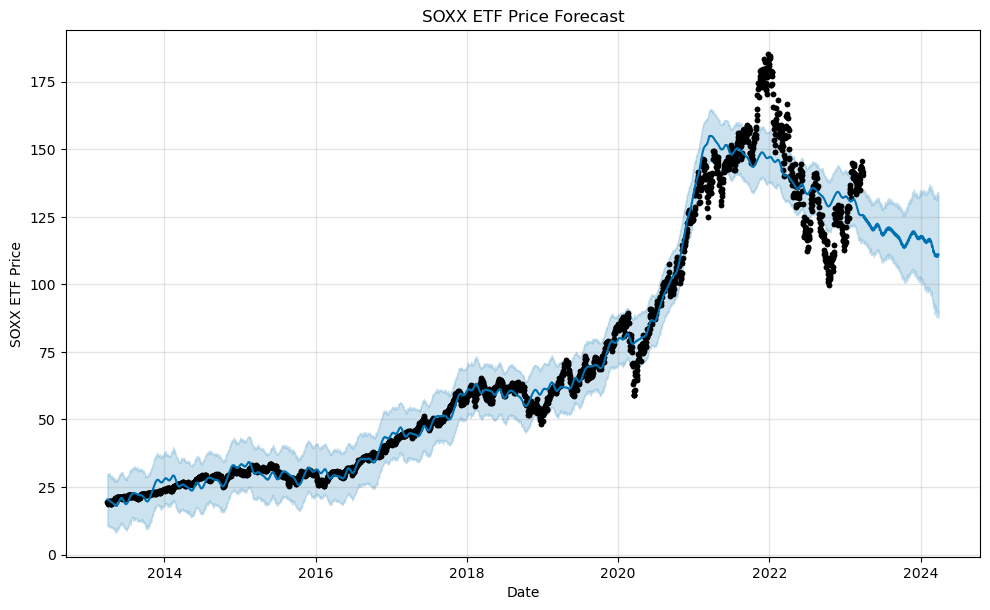

In [7]:
import matplotlib.pyplot as plt

# Plot the forecast for AMD
fig_soxx = model_soxx.plot(forecast_soxx)
plt.xlabel('Date')
plt.ylabel('SOXX ETF Price')
plt.title('SOXX ETF Price Forecast')
plt.show()

[*********************100%%**********************]  1 of 1 completed


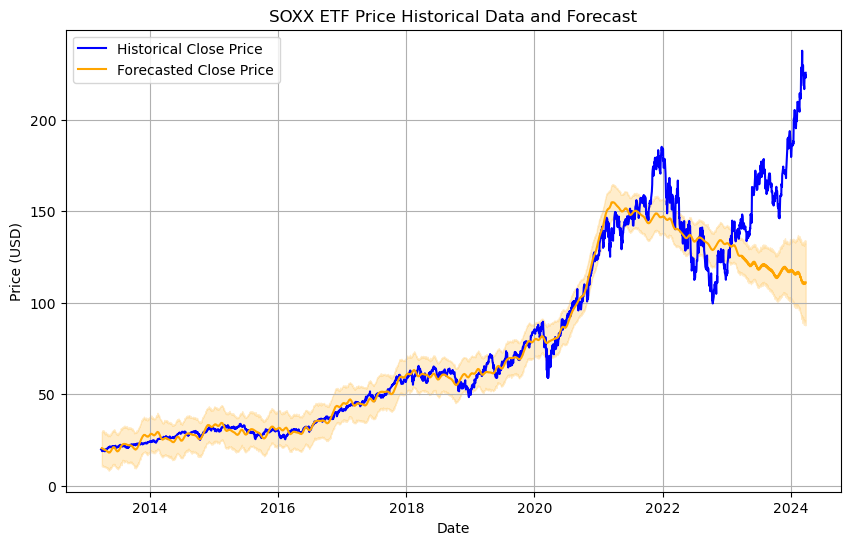

In [8]:
# Ticker symbol for SOXX
soxx_symbol = 'SOXX'

# Fetch SOXX stock data for the past 11 years
soxx_data = yf.download(soxx_symbol, period='11y')

# Plot both historical data and forecast for SOXX
plt.figure(figsize=(10, 6))

# Plot historical data for SOXX
plt.plot(soxx_data.index, soxx_data['Close'], label='Historical Close Price', color='blue')

# Plot forecast for SOXX
plt.plot(forecast_soxx['ds'], forecast_soxx['yhat'], label='Forecasted Close Price', color='orange')
plt.fill_between(forecast_soxx['ds'], forecast_soxx['yhat_lower'], forecast_soxx['yhat_upper'], color='orange', alpha=0.2)

plt.title('SOXX ETF Price Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Calculate the percentage change of daily returns for SOXX
daily_returns_soxx = soxx_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns_soxx = daily_returns_soxx.dropna()

# Convert the series of daily returns into a DataFrame for SOXX
daily_returns_df_soxx = pd.DataFrame({'Daily_Returns_SOXX': daily_returns_soxx})

# Display the DataFrame for SOXX
daily_returns_df_soxx

,Daily_Returns_SOXX
Date,
2013-04-01,-0.020436
2013-04-02,-0.008793
2013-04-03,-0.020178
2013-04-04,0.013137
2013-04-05,-0.005257
...,...
2024-03-21,0.022500
2024-03-22,0.001199
2024-03-25,-0.003903


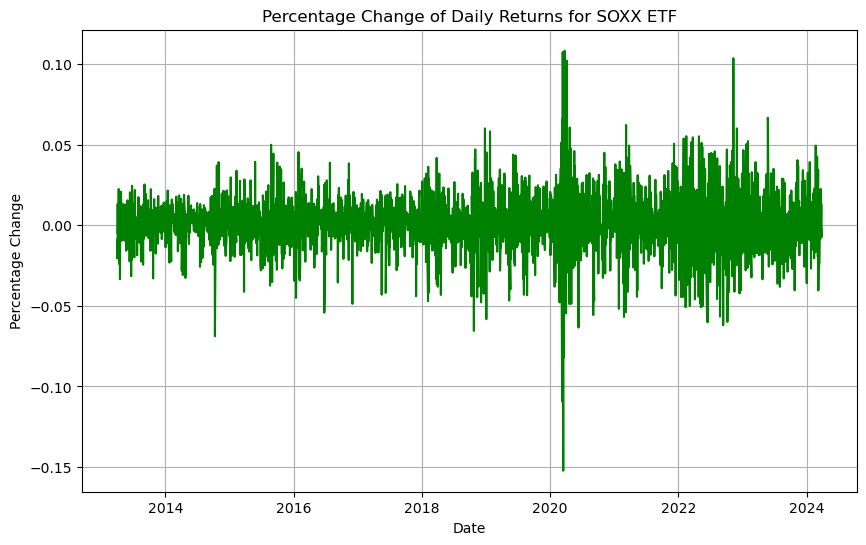

In [10]:
import matplotlib.pyplot as plt

# Calculate the percentage change of daily returns for SOXX
daily_returns_soxx = soxx_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns_soxx = daily_returns_soxx.dropna()

# Plot the percentage change of daily returns for SOXX
plt.figure(figsize=(10, 6))
plt.plot(daily_returns_soxx.index, daily_returns_soxx.values, color='green')
plt.title('Percentage Change of Daily Returns for SOXX ETF')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

In [11]:
import pandas as pd
from tsfresh import extract_features

# Define example daily_returns_soxx DataFrame
daily_returns_soxx = pd.DataFrame({
    'time': [1, 2, 3],
    'value': [0.1, 0.2, 0.3]
})

# Rename 'time' column to 'id' as required by tsfresh
daily_returns_soxx.rename(columns={'time': 'id'}, inplace=True)

# Extract features using tsfresh
extracted_features = extract_features(daily_returns_soxx, column_id='id')

# Display the extracted features
print(extracted_features)


Feature Extraction: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
1                                             0.0                       0.0   
2                                             0.0                       0.0   
3                                             0.0                       0.0   

   value__has_duplicate_min  value__has_duplicate  value__sum_values  \
1                       0.0                   0.0                0.1   
2                       0.0                   0.0                0.2   
3                       0.0                   0.0                0.3   

   value__abs_energy  value__mean_abs_change  value__mean_change  \
1               0.01                     NaN                 NaN   
2               0.04                     NaN                 NaN   
3               0.09                     NaN                 NaN   

   value__mean_second_derivative_central  value__median  value__mean  \
1                                    NaN         

In [12]:
extracted_features.describe()

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,value__mean,value__length,value__standard_deviation,value__variation_coefficient,value__variance,value__skewness,value__kurtosis,value__root_mean_square,value__absolute_sum_of_changes,value__longest_strike_below_mean,value__longest_strike_above_mean,value__count_above_mean,value__count_below_mean,value__last_location_of_maximum,value__first_location_of_maximum,value__last_location_of_minimum,value__first_location_of_minimum,value__percentage_of_reoccurring_values_to_all_values,value__percentage_of_reoccurring_datapoints_to_all_datapoints,value__sum_of_reoccurring_values,value__sum_of_reoccurring_data_points,value__ratio_value_number_to_time_series_length,value__sample_entropy,value__maximum,value__absolute_maximum,value__minimum,value__benford_correlation,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__c3__lag_1,value__c3__lag_2,value__c3__lag_3,value__cid_ce__normalize_True,value__cid_ce__normalize_False,value__symmetry_looking__r_0.0,value__symmetry_looking__r_0.05,value__symmetry_looking__r_0.1,value__symmetry_looking__r_0.15000000000000002,value__symmetry_looking__r_0.2,value__symmetry_looking__r_0.25,value__symmetry_looking__r_0.30000000000000004,value__symmetry_looking__r_0.35000000000000003,value__symmetry_looking__r_0.4,value__symmetry_looking__r_0.45,value__symmetry_looking__r_0.5,value__symmetry_looking__r_0.55,value__symmetry_looking__r_0.6000000000000001,value__symmetry_looking__r_0.65,value__symmetry_looking__r_0.7000000000000001,value__symmetry_looking__r_0.75,value__symmetry_looking__r_0.8,value__symmetry_looking__r_0.8500000000000001,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__large_standard_deviation__r_0.05,value__large_standard_deviation__r_0.1,value__large_standard_deviation__r_0.15000000000000002,value__large_standard_deviation__r_0.2,value__large_standard_deviation__r_0.25,value__large_standard_deviation__r_0.30000000000000004,value__large_standard_deviation__r_0.35000000000000003,value__large_standard_deviation__r_0.4,value__large_standard_deviation__r_0.45,value__large_standard_deviation__r_0.5,value__large_standard_deviation__r_0.55,value__large_standard_deviation__r_0.6000000000000001,value__large_standard_deviation__r_0.65,value__large_standard_deviation__r_0.7000000000000001,value__large_standard_deviation__r_0.75,value__large_standard_deviation__r_0.8,value__large_standard_deviation__r_0.8500000000000001,value__large_standard_deviation__r_0.9,value__large_standard_deviation__r_0.9500000000000001,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,value__quantile__q_0.4,value__quantile__q_0.6,value__quantile__q_0.7,value__quantile__q_0.8,value__quantile__q_0.9,value__autocorrelation__lag_0,value__autocorrelation__lag_1,value__autocorrelation__lag_2,value__autocorrelation__lag_3,value__autocorrelation__lag_4,value__autocorrelation__lag_5,value__autocorrelation__lag_6,value__autocorrelation__lag_7,value__autocorrelation__lag_8,value__autocorrelation__lag_9,"value__agg_autocorrelation__f_agg_""mean""__maxlag_40","value__agg_autocorrelation__f_agg_""median""__maxlag_40","value__agg_autocorrelation__f_agg_""var""__maxlag_40",value__partial_autocorrelation__lag_0,value__partial_autocorrelation__lag_1,value__partial_autocorrelation__lag_2,value__partial_autocorrelation__lag_3,value__partial_autocorrelation__lag_4,value__partial_autocorrelation__lag_5,value__partial_autocorrelation__lag_6,value__partial_autocorrelation__lag_7,value__partial_autocorrelation__lag_8,value__partial_autocorrelation__lag_9,value__number_cwt_peaks__n_1,value__number_cwt_peaks__n_5,value__number_peaks__n_1,value__number_peaks__n_3

In [13]:

import pandas as pd
import numpy as np  # Add this import
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

def clean_extracted_features(features, missing_threshold=0.1, correlation_threshold=0.9):
    # 1. Remove low-variance features
    selector = VarianceThreshold(threshold=0.01)
    features_var_filtered = selector.fit_transform(features.fillna(0))
    
    # Convert back to DataFrame after VarianceThreshold (which outputs a NumPy array)
    features_var_filtered = pd.DataFrame(features_var_filtered, columns=features.columns[selector.get_support()])
    
    # 2. Handle missing values
    missing_counts = features_var_filtered.isnull().mean()
    features_no_missing = features_var_filtered.loc[:, missing_counts <= missing_threshold]
    
    # 3. Remove highly correlated features
    corr_matrix = features_no_missing.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    features_low_correlation = features_no_missing.drop(columns=to_drop)
    
    # 4. Normalize/Scale features (optional)
    scaler = MinMaxScaler()
    features_scaled = pd.DataFrame(scaler.fit_transform(features_low_correlation), columns=features_low_correlation.columns)
    
    return features_scaled

# To use the function, ensure `extracted_features` is your DataFrame from tsfresh:
# cleaned_features = clean_extracted_features(extracted_features)
# print(cleaned_features)
# Assuming extracted_features is your DataFrame from tsfresh
cleaned_features = clean_extracted_features(extracted_features)

# Print the cleaned features
cleaned_features.describe()



,value__benford_correlation
count,3.000000
mean,0.430163
std,0.514424
min,0.000000
25%,0.145244
50%,0.290489
75%,0.645244
max,1.000000


21:17:04 - cmdstanpy - INFO - Chain [1] start processing
21:17:04 - cmdstanpy - INFO - Chain [1] done processing


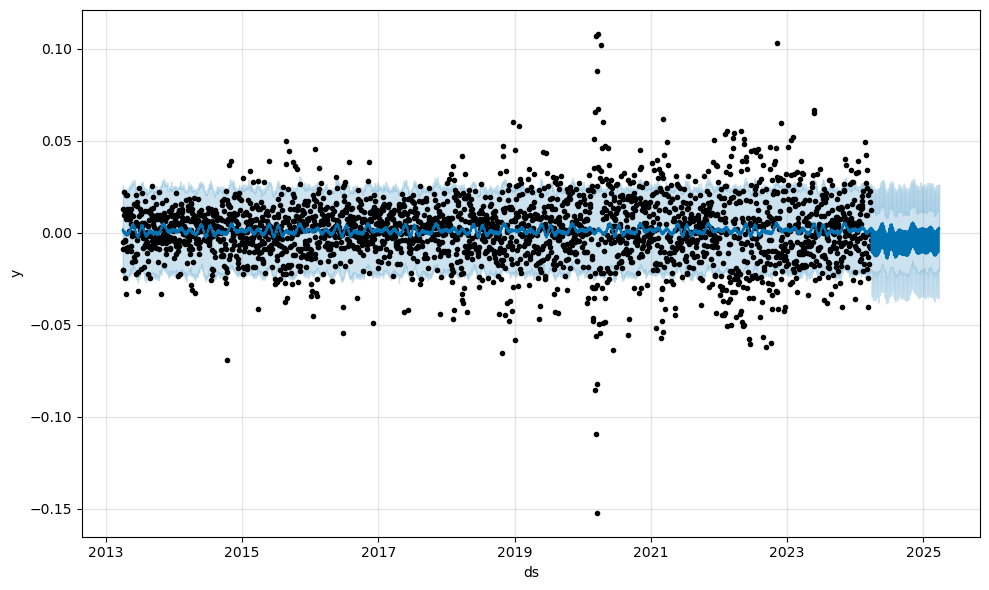

In [14]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data for Prophet
prophet_df_soxx = daily_returns_df_soxx.reset_index().rename(columns={'Date': 'ds', 'Daily_Returns_SOXX': 'y'})

# Initialize the Prophet model
soxx_model = Prophet()
soxx_model.fit(prophet_df_soxx)

# Make future DataFrame for 1 year (365 days) for SOXX
future_soxx = soxx_model.make_future_dataframe(periods=365)

# Make predictions for SOXX
soxx_forecast = soxx_model.predict(future_soxx)

# Plot the predictions for SOXX
soxx_model.plot(soxx_forecast)
plt.show()

NameError: name 'df' is not defined